How well do jobs and skills pay for Data Analysts?

Methology

1.Evaluate median salary for top 6 data jobs

2.Find median salary per skill for Data Analysts

3.Visualize for highest paying skills and most demanded skills


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from matplotlib.ticker import FuncFormatter

In [3]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills) 

df_US = df[df['job_country']=='United States'].dropna(subset=['salary_year_avg']).copy()

In [4]:
job_titles =df_US['job_title_short'].value_counts().index[:6].tolist()

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [6]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

Plot Salary Distributions


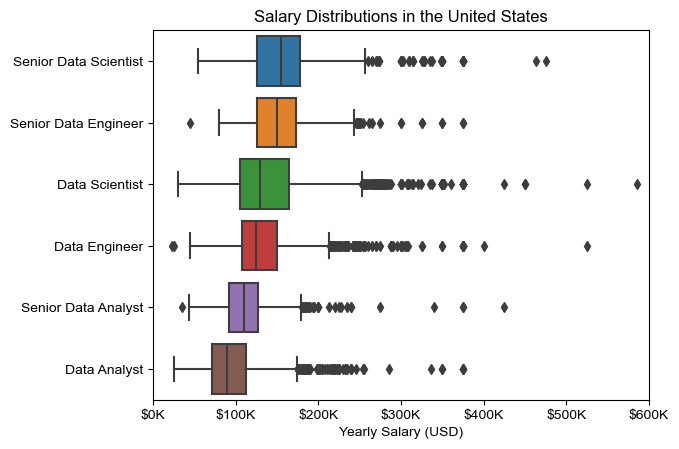

In [7]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order= job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigate Median Salary Vs Skill for Data Analysts


In [8]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US.dropna(subset=['salary_year_avg'],inplace=True)

In [9]:
df_DA_US = df_DA_US.explode('job_skills')

In [10]:
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [11]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [12]:
df_DA_top_pay = df_DA_top_pay.head(10)

In [13]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [14]:
df_DA_skills = df_DA_skills.head(10).sort_values(by= 'median', ascending=False)

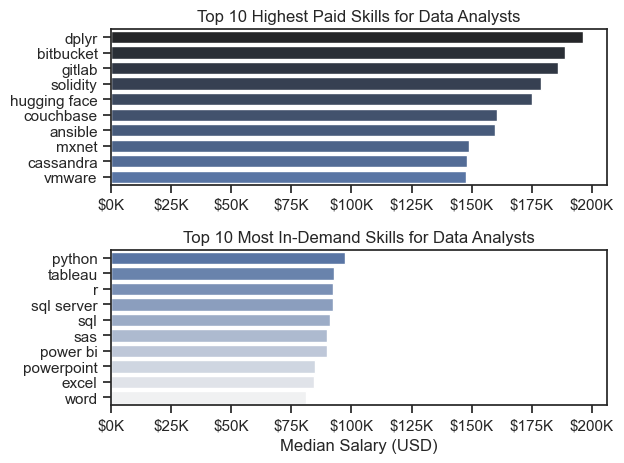

In [15]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data= df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax= ax[0], palette= 'dark:b')
#df_DA_US_Top_Pay[::-1].plot(kind= 'barh', y= 'median', ax= ax[0], legend=False)
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.barplot(data= df_DA_skills, x = 'median', y = df_DA_skills.index, ax= ax[1], palette= 'light:b_r')
#df_DA_US_Top_Skills[::-1].plot(kind= 'barh', y='median', ax= ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

plt.tight_layout()
plt.show()